## Exercício 1:

a) $\pi$ **via Monte Carlo (etapa 1)**: Considere um círculo de raio $r=1$ inscrito em um quadrado de lado $2r=2$. A área do círculo é $\pi r^2 = \pi$. A área do quadrado é $4$. A razão entre a área do círculo e a área do quadrado é $\pi/4$. Se gerarmos $N$ pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será $\pi/4$. Assim, podemos estimar $\pi$ como $4$ vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados $N$ para ver como o resultado muda. Implemente na forma de uma função com assinatura:

```python
def pi_monte_carlo(N):
    '''
    DOCSTRING
    '''
    # seu código aqui
    return estimativa_pi
```
b) (Intermediário) A função `pi_monteCarlo(n1)` deve também receber um booleano `return_points` que indica se a função deve retornar os pontos sorteados separados em duas listas: `p_in` e `p_out`. Usando estas listas, faça um gráfico dos pontos sorteados, com os pontos dentro do círculo em azul e os pontos fora em vermelho. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng()

def pi_monteCarlo (n1, return_points = False):

  '''
  This function aims to estimate the value of pi using Monte Carlo Gaming Thoery

  Args:
  n1 = Used to generate 10^n numbers for x and for y

  Returns:
  Estimative of pi.
  '''

  x = rng.random(10**n1)
  y = rng.random(10**n1)

  r = np.sqrt((x**2)+(y**2))

  bool_arr = r <= 1

  p_in = r[bool_arr]
  p_out = r[~bool_arr]

  est_pi = 4*(len(p_in)/len(r))

  if return_points:
    fig, ax = plt.subplots()
    
    ax.set_aspect('equal')

    ax.scatter(x[bool_arr], y[bool_arr], color = 'Blue', s= 0.3, label = 'Inside')
    ax.scatter(x[~bool_arr], y[~bool_arr], color = 'Red', s = 0.3, label = 'Outside')
    
    circle = plt.Circle((0,0), 1, color = 'Black', fill = False)
    ax.add_artist(circle)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Pi Estimative via Monte Carlo')

    pi_text = f'Estimated Pi: {est_pi}'
    ax.text(0.05, 0.95, pi_text, transform = ax.transAxes, fontsize = 12, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.8))

    return est_pi, p_in, p_out
  else:
    return est_pi, p_in, p_out

n1 = int(input('Please input the value of n. This will generate 10^n pairs of coordinates, and it will be used to estimate Pi: \n'))
return_points = input('Do you wish to plot the graph that shows which points fell inside/outside the circle? \n')

est_pi, p_in, p_out = pi_monteCarlo(n1, return_points)


print(f'The estimated value of pi is {est_pi}, and the true value of pi is {np.pi}')


c) (Avançado) Seja $E_N = |\pi-\pi_N|/\pi$ o erro relativo da estimativa de $\pi$ com $N$ pontos. Faça gráficos de $E_N$ em função de $N$ para $N = 10^1, 10^2, 10^3, 10^4, 10^5, 10^6$. Compare os gráficos feitos em escala linear (`plt.plot`), log-log (`plt.loglog`), e semi-logs (`plt.semilogx` ou `plt.semilogy`). O que você observa? Faça um ajuste dos dados com uma função apropriada usando `numpy.polyfit` ou `scipy.optimize.curve_fit`.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


rng = np.random.default_rng()

def pi_monteCarlo (n1):

  '''
  This function aims to estimate the value of pi using Monte Carlo Gaming Thoery

  Args:
  n1 = Used to generate 10^n numbers for x and for y

  Returns:
  Estimative of pi.
  '''

  x = rng.random(10**n1)
  y = rng.random(10**n1)

  r = np.sqrt((x**2)+(y**2))

  bool_arr = r <= 1

  p_in = r[bool_arr]
  p_out = r[~bool_arr]

  est_pi = 4*(len(p_in)/len(r))
  return est_pi

def error_Pi(my_pi):
  err = np.abs(my_pi-np.pi)/np.pi
  return err

n1 = np.array([1, 2, 3, 4, 5, 6])
vec_n1 = np.vectorize(pi_monteCarlo)

my_pi = 0
err = 0

qtt = 10
for _ in range(qtt):
  new = vec_n1(n1)
  my_pi += new/qtt
  err += error_Pi(new)/qtt

# assumindo E = k (10^n)^p = k 10^(np)
# linearizando y = ax + b
# taca o log:
#   log10(E) = log10(k) + n*p
#   y = log10(E)
#   x = n
#   y = a*x + b
#   a = n
#   b = log10(k)

cfs = np.polyfit(n1, np.log10(err), 1) # retorna (a, b)
poly = np.poly1d(cfs) # y = a*x + b
y_fit = poly(n1) # y(x)
E_fit = 10**y_fit # invertendo a linearização

print(cfs)

[-0.54895857 -0.29161635]


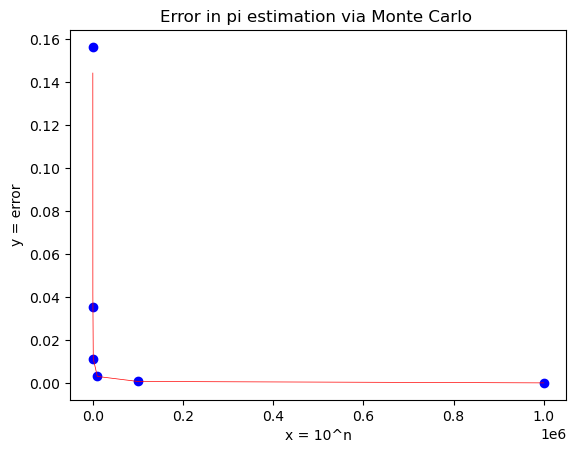

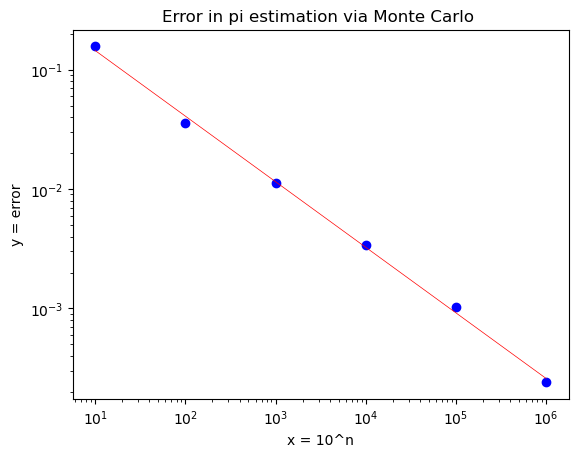

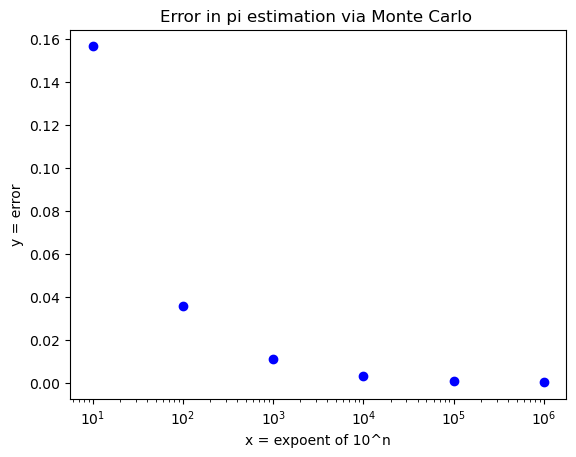

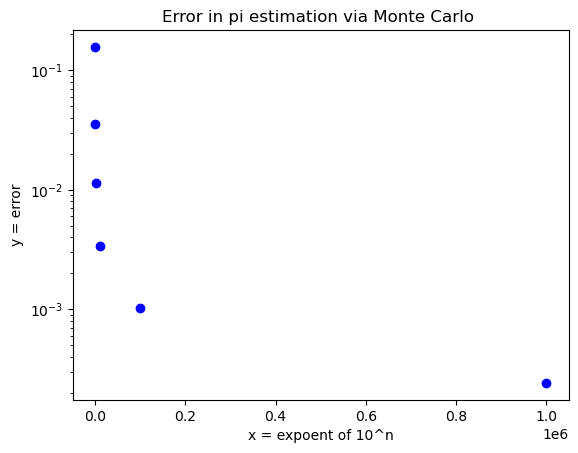

In [7]:
plt.plot(10**n1, err, 'o', color = 'Blue', label = 'Averages of the errors', linewidth = 1)
plt.plot(10**n1, E_fit, color='Red', label = 'Adjusted Curve', linewidth = 0.5)
plt.xlabel('x = 10^n')
plt.ylabel('y = error')
plt.title('Error in pi estimation via Monte Carlo ')
plt.show()

plt.loglog(10**n1, err, 'o', color = 'Blue', label = 'Averages of the errors', linewidth = 1)
plt.plot(10**n1, E_fit, color='Red', label = 'Adjusted Curve', linewidth = 0.5)
plt.xlabel('x = 10^n')
plt.ylabel('y = error')
plt.title('Error in pi estimation via Monte Carlo ')
plt.show()

plt.semilogx(10**n1, err, 'o', color = 'Blue', label = 'Averages of the errors', linewidth = 1)
plt.xlabel('x = expoent of 10^n')
plt.ylabel('y = error')
plt.title('Error in pi estimation via Monte Carlo ')
plt.show()

plt.semilogy(10**n1, err, 'o', color = 'Blue', label = 'Averages of the errors', linewidth = 1)
plt.xlabel('x = expoent of 10^n')
plt.ylabel('y = error')
plt.title('Error in pi estimation via Monte Carlo ')
plt.show()